<a href="https://colab.research.google.com/github/hazelkimhyejin/DEMO/blob/main/CT2011_Lab_02_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance**


## **Import CSV file**

Exam marks secured by some high school students from the United States. Information about the variables:
* gender
* race/ethnicity
* parental level of education
* lunch
* math score
* reading score
* writing score


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read the relevant csv file
path = 'https://raw.githubusercontent.com/timcyku/ct2011/refs/heads/main/studentsperformance.csv'

df = pd.read_csv(path)

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **Task 1 [3 marks]: For each subject (math, reading, writing), plot the distribution of the exam scores for all the different race/ethnicity groups**

In [16]:
selected_columns_df = df[['race/ethnicity', 'math score', 'reading score', 'writing score']]

In [18]:
selected_columns_df.head()

,race/ethnicity,math score,reading score,writing score
0,group B,72,72,74
1,group C,69,90,88
2,group B,90,95,93
3,group A,47,57,44
4,group C,76,78,75


In [21]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


/tmp/ipython-input-497095969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race/ethnicity', y=subject, data=df, palette="Set3")


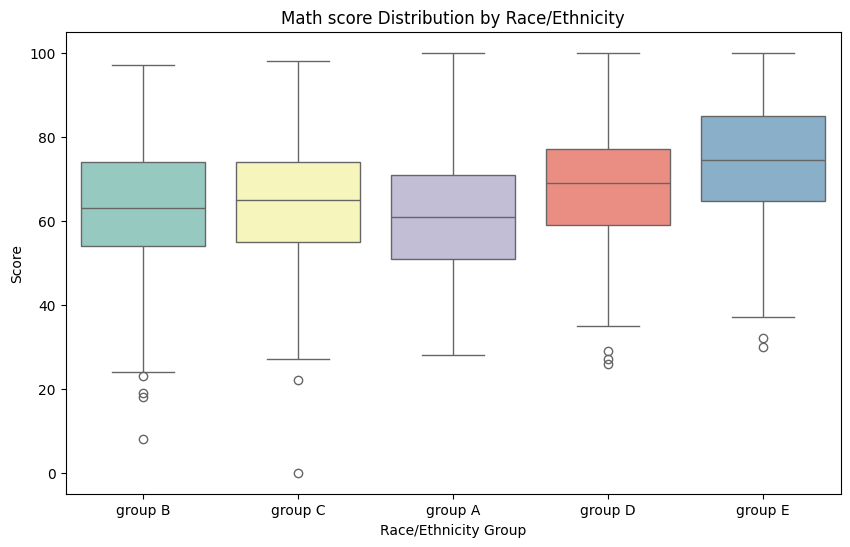

/tmp/ipython-input-497095969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race/ethnicity', y=subject, data=df, palette="Set3")


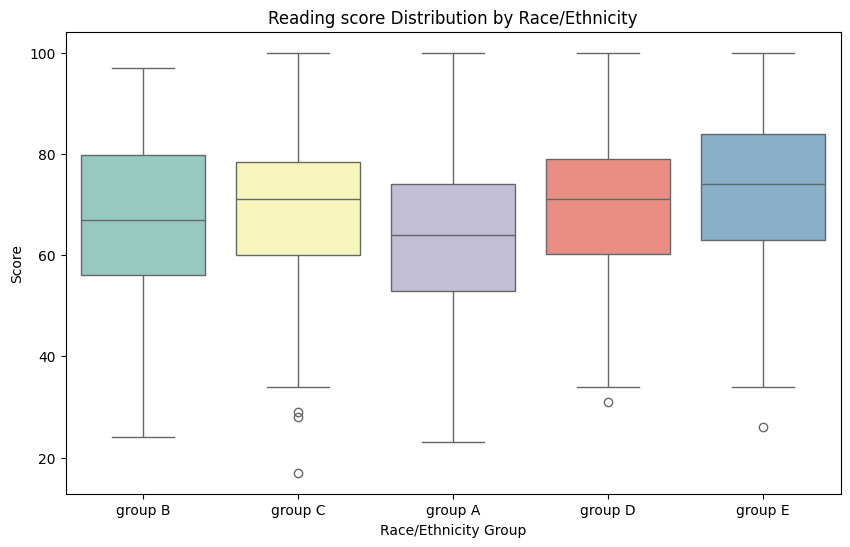

/tmp/ipython-input-497095969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race/ethnicity', y=subject, data=df, palette="Set3")


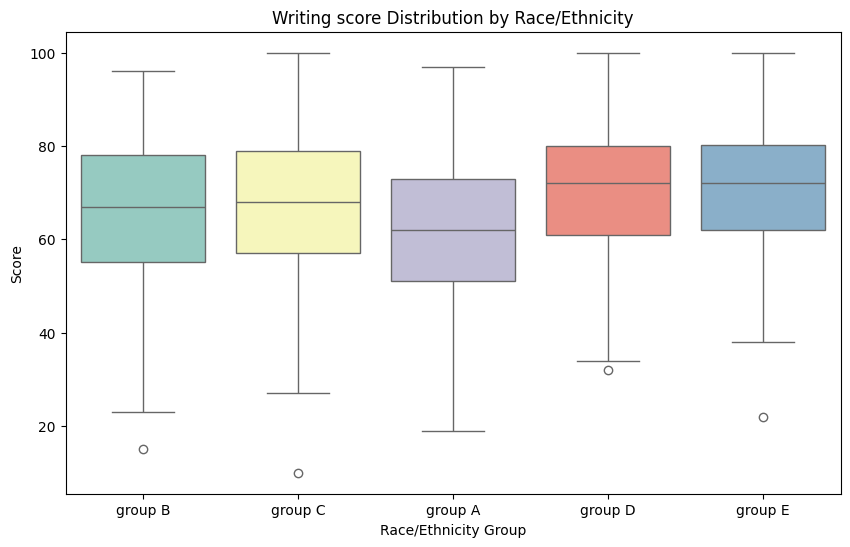

In [34]:
subjects = ['math score', 'reading score', 'writing score']

for subject in subjects:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='race/ethnicity', y=subject, data=df, palette="Set3")
    plt.title(f'{subject.capitalize()} Distribution by Race/Ethnicity')
    plt.ylabel('Score')
    plt.xlabel('Race/Ethnicity Group')
    plt.show()

## **Task 2 [5 marks]: For each subject (math, reading, writing), use hypothesis testing to determine if students who did complete the test preparation course had significantly better performance than the rest.**

Null hypothesis H0 :

Alternate hypothesis H1 :

In [36]:
from scipy.stats import ttest_ind

#separate Groups
completed = df[df['test preparation course'] == 'completed']
not_completed = df[df['test preparation course'] == 'none']

#subjects
subjects = ['math score', 'reading score', 'writing score']

#run independent t-test for each subject
for subject in subjects:
    stat, p_value = ttest_ind(completed[subject], not_completed[subject], equal_var=False)
    print(f"{subject.title()}:")
    print(f"  t-statistic = {stat:.3f}, p-value = {p_value:.3f}")

    if p_value < 0.05:
        print("  ✅ Significant difference: Students who completed the course performed better.\n")
    else:
        print("  ❌ No significant difference in performance.\n")

Math Score:
  t-statistic = 5.787, p-value = 0.000
  ✅ Significant difference: Students who completed the course performed better.

Reading Score:
  t-statistic = 8.004, p-value = 0.000
  ✅ Significant difference: Students who completed the course performed better.

Writing Score:
  t-statistic = 10.753, p-value = 0.000
  ✅ Significant difference: Students who completed the course performed better.



## **Task 3 [5 marks]: For each subject (math, reading, writing), use hypothesis testing to determine if the gender of the students had a significant impact on the  performance. You are required to print out the conclusion in each case.**

In [41]:
from scipy.stats import ttest_ind

#separate groups
male = df[df['gender'] == 'male']
female = df[df['gender'] == 'female']

#subjects
subjects = ['math score', 'reading score', 'writing score']

#run independent t-test for each subject
for gender in subjects:
  stat, p_value = ttest_ind(male[gender], female[gender], equal_var=False)
  print(f"{gender.title()}:")
  print(f"  t-statistic = {stat:.3f}, p-value = {p_value:.3f}")

  if p_value < 0.05:
      print("  ✅ Significant difference: Gender had a significant impact on the performance.\n")
  else:
      print("  ❌ Gender had no significant difference in performance.\n")

Math Score:
  t-statistic = 5.398, p-value = 0.000
  ✅ Significant difference: Gender had a significant impact on the performance.

Reading Score:
  t-statistic = -7.968, p-value = 0.000
  ✅ Significant difference: Gender had a significant impact on the performance.

Writing Score:
  t-statistic = -9.998, p-value = 0.000
  ✅ Significant difference: Gender had a significant impact on the performance.



## **Task 4 [7 marks]:**

* **(a) Does having standard lunch have a significant impact on the scores of each subject?**
* **(b) If so, do you think if there is a causal relationship between the two? Is there an association between the variable lunch and other variables in the data set?**

**Justify your answers to both part (a) and (b).**

H0 = lunch got no impact on scores
H1 = lunch has impact on scores

In [46]:
import scipy.stats

#separate groups
lunch_standard = df[df['lunch'] == 'standard']
lunch_free = df[df['lunch'] == 'free/reduced']

#subjects
subjects = ['math score', 'reading score', 'writing score']

#run independent t-test for each subject
for subject in subjects:
  stat, p_value = scipy.stats.ttest_ind(lunch_standard[subject], lunch_free[subject], equal_var=False)
  print(f"{subject.title()}:")
  print(f"  t-statistic = {stat:.3f}, p-value = {p_value:.3f}")

  if p_value < 0.05:
    print ("Having a standard lunch had a significant impact on the scores of each subject.\n")
  else:
    print ("Having a standard lunch did not have a significant impact on the scores of each subject. \n")

Math Score:
  t-statistic = 11.484, p-value = 0.000
Having a standard lunch had a significant impact on the scores of each subject.

Reading Score:
  t-statistic = 7.293, p-value = 0.000
Having a standard lunch had a significant impact on the scores of each subject.

Writing Score:
  t-statistic = 7.841, p-value = 0.000
Having a standard lunch had a significant impact on the scores of each subject.

